**PREGUNTAS**

1.-- Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando head().


In [1]:
import pandas as pd
                
x=[]

for n in range(1995,2018):
    if n < 2000:
        skip = 3
    else:
        skip=2
   
    nombrearchivo= 'Precio_Bolsa_Nacional_($kwh)_'+str(n)
    if n>=2016:
        nombrearchivo +='.xls'
    else:
        nombrearchivo+='.xlsx'
        
    y = pd.read_excel(nombrearchivo, skiprows=skip, parse_cols=24)
    x.append(y)
    z=pd.concat(x)
    

    

                    

2.-- Compute e imprima el número de registros con datos faltantes.

In [2]:
len(z)-len (z.dropna())

28

3.-- Compute e imprima el número de registros duplicados.

In [3]:
len(z)-len(z.drop_duplicates())

67

4.-- Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [4]:
len(z)-len(z.drop_duplicates())

67

5.-- Compute y grafique el precio promedio diario.

In [5]:
z=z.dropna().drop_duplicates()

In [6]:
prom = z.mean(axis=1)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

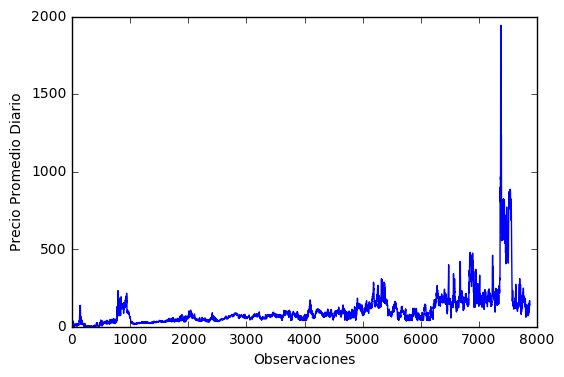

In [8]:
plt.plot(range(len(prom)),prom)
plt.xlabel("Observaciones")    
plt.ylabel("Precio Promedio Diario")
plt.show()

6.-- Compute y grafique el precio máximo por mes.

In [9]:
w=[]
for n in range(len(z['Fecha'])):
    w.append (str(z.iloc[n,0])[0:7])
z['aniomes']=w
z.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,aniomes
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,1995-07
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1995-07
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,1995-07
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,1995-07
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1995-07


In [10]:
maxmes = z.groupby('aniomes').max()
maxmes= maxmes.max(axis=1)

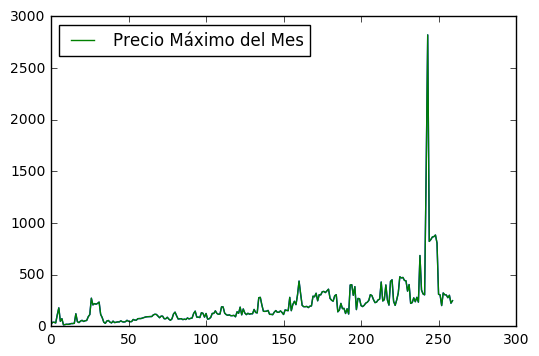

In [11]:
plt.plot(range(len(maxmes)),maxmes)
listas = pd.Series(maxmes).values 
plt.plot(listas, label = "Precio Máximo del Mes")
plt.legend(loc="upper left")

plt.show()

7.-- Compute y grafique el precio mínimo mensual.

In [12]:
minmes = z.groupby('aniomes').min()
minmes= minmes.min(axis=1)

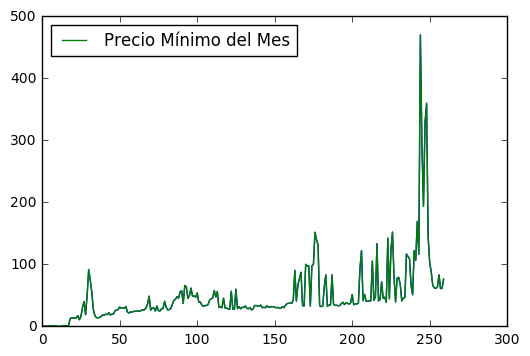

In [13]:
plt.plot(range(len(minmes)),minmes)
lista = pd.Series(minmes).values 
plt.plot(lista, label = "Precio Mínimo del Mes")
plt.legend(loc="upper left")
 
plt.show()

8.-- Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [14]:
prommes = z.groupby('aniomes').mean()
prommes= prommes.mean(axis=1)

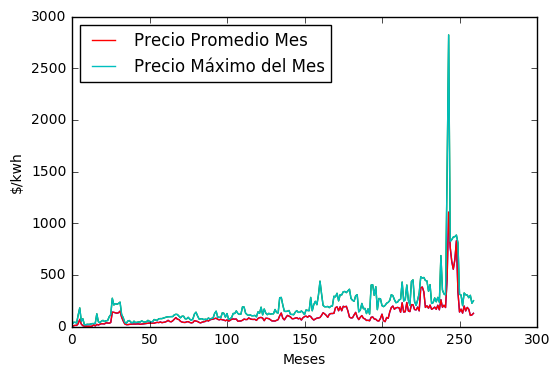

In [38]:
plt.xlabel("Meses")    
plt.ylabel("$/kwh")
lista1 = pd.Series(prommes).values  
plt.plot(lista1)        
lista2 = pd.Series(maxmes).values   
plt.plot(lista2)

plt.plot(lista1, label = "Precio Promedio Mes")
plt.plot(lista2, label = "Precio Máximo del Mes")
plt.legend(loc="upper left")

plt.show()

9.-- Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [15]:
aux=[]
cont=1
aux.append(z.iloc[0])
for n in range(1,len(z['Fecha'])):
    if (cont>2):
        aux.append(z.iloc[n])
    if (cont<7):
        cont=cont+1
    else:
        cont=1

In [16]:
aux=[]
maxaux=0
aux1=[]
cont=1
aux.append(max(z.iloc[0][1:24]))
for n in range(1,len(z['Fecha'])):
    if (cont>2):
        aux.append(z.iloc[n][1:24])
        maxaux=max(aux[-1])
        for i in range(len(aux[-1])):
            if (aux[-1][i]==maxaux):
                aux1.append(i)           
                       
                       
    if (cont<7):
        cont=cont+1
    else:
        cont=1

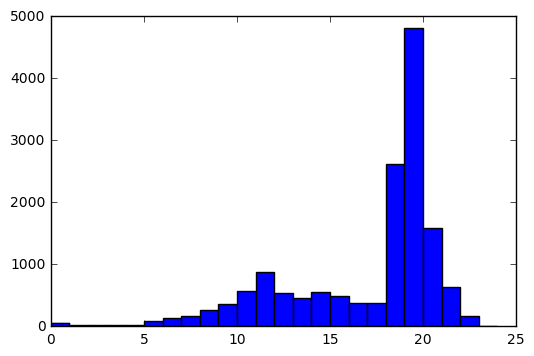

In [17]:
from matplotlib.pylab import hist, show
hist(aux1,24, (0,24))

show()

10.-- Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.


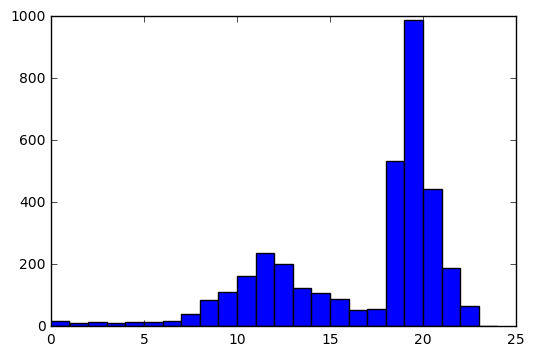

In [18]:
aux2=[]
maxaux1=0
aux3=[]
aux4=[]
cont1=1
aux.append(max(z.iloc[0][1:24]))
for n in range(1,len(z['Fecha'])):
    if (cont1==1):
        aux4.append(z.iloc[n])
        aux2.append(z.iloc[n][1:24])
        maxaux1=max(aux2[-1])
        for i in range(len(aux2[-1])):
            if (aux2[-1][i]==maxaux1):
                aux3.append(i)           
                       
                       
    if (cont1<7):
        cont1=cont1+1
    else:
        cont1=1
from matplotlib.pylab import hist, show
hist(aux3,24, (0,24))
show()

11.-- Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

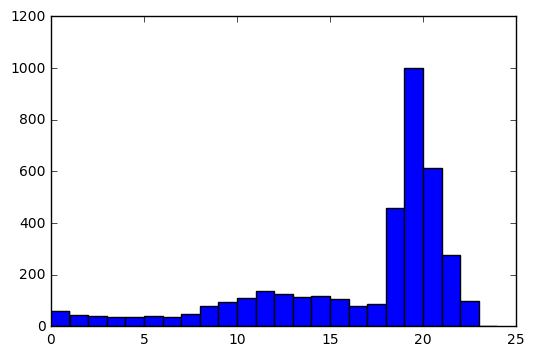

In [19]:
aux5=[]
maxaux2=0
aux6=[]
aux7=[]
cont2=1
aux.append(max(z.iloc[0][1:24]))
for n in range(1,len(z['Fecha'])):
    if (cont2==2):
        aux7.append(z.iloc[n])
        aux5.append(z.iloc[n][1:24])
        maxaux2=max(aux5[-1])
        for i in range(len(aux5[-1])):
            if (aux5[-1][i]==maxaux2):
                aux6.append(i)           
                       
                       
    if (cont2<7):
        cont2=cont2+1
    else:
        cont2=1
from matplotlib.pylab import hist, show
hist(aux6,24, (0,24))
show()

12.-- Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [20]:
auxfecha=[]
auxprecio=[]
fecha=[]
precio=0
añoact=0
vmin=20000000
fmin=0
año=0
for año in range (1995,2018):
    for n in range(len(z['Fecha'])):
        fecha=str(z.iloc[n,0]).split('-')
        añoact=fecha[0]
        if (str(año)==añoact):
            for i in range(1,24):
                precio=float(z.iloc[n][i])
                if (precio<vmin):
                    vmin=precio
                    fmin=z.iloc[n][0]
    auxfecha.append([fmin])
    auxprecio.append([str(vmin)])
    vmin=20000000


In [20]:
df1 = pd.DataFrame({'Fecha': auxfecha,'Precio': auxprecio},index=[0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
df1

,Fecha,Precio
0,[1995-07-28],[0.0]
1,[1996-05-10 00:00:00],[0.0]
2,[1997-07-15 00:00:00],[10.88231]
3,[1998-07-09 00:00:00],[13.84733]
4,[1999-03-28 00:00:00],[18.359530000000003]
5,[2000-03-25],[21.531167]
6,[2001-08-20],[24.822879]
7,[2002-04-20],[26.777682]
8,[2003-02-14],[37.013438]
9,[2004-03-29],[32.252998]


13.-- Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual

In [21]:
prom = z.mean(axis=1)

In [26]:
auxmes=[]
fecha=[]
mesact=0
sumaprecio=0.0
fmes=[]
año=0
nhoras=0
sumaprecio=0.0
for n in range(len(z['Fecha'])):
    for año in range (1995,2018):
        for mes in ['07','08','09','10','11','12','01','02','03','04','05','06']:
            fecha=str(z.iloc[n,0]).split('-')
            mesact=fecha[1]
            if (mes==mesact):
                for i in range(1,24):
                    sumaprecio=sumaprecio+float(z.iloc[n][i])
                    nhoras=nhoras+24
                    
        prommes=sumaprecio/nhoras
        fmes=[año,mes]
        auxmes.append([prommes,fmes])
        sumaprecio=0
        nhoras=0

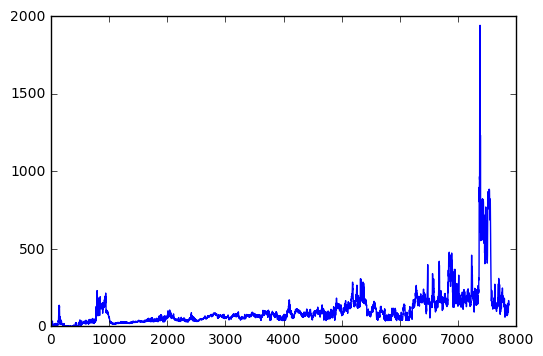

In [27]:
listapd = pd.Series(prom).values  
plt.plot(listapd)        
listamm = pd.Series(auxmes).values   
plt.plot(listamm)

plt.plot(listapd, label = "Precio Promedio Diario")
plt.plot(listamm, label = "Precio Promedio Mensual")
plt.legend(loc="upper left")


plt.show()